In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib as ta

In [21]:
temp=pd.read_csv('BTCUSD_5.csv')
df=pd.read_csv('aroon_data.csv')
df.tail()

,Local time,Open,High,Low,Close,Volume
361,27.12.2021 05:00:00.000 GMT+0500,50738,52013,50420,50654,1.2364
362,28.12.2021 05:00:00.000 GMT+0500,50654,50654,47272,47496,1.6673
363,29.12.2021 05:00:00.000 GMT+0500,47499,48090,46058,46412,1.4404
364,30.12.2021 05:00:00.000 GMT+0500,46412,47848,45938,47068,1.1039
365,31.12.2021 05:00:00.000 GMT+0500,47068,48512,46779,47429,0.9461


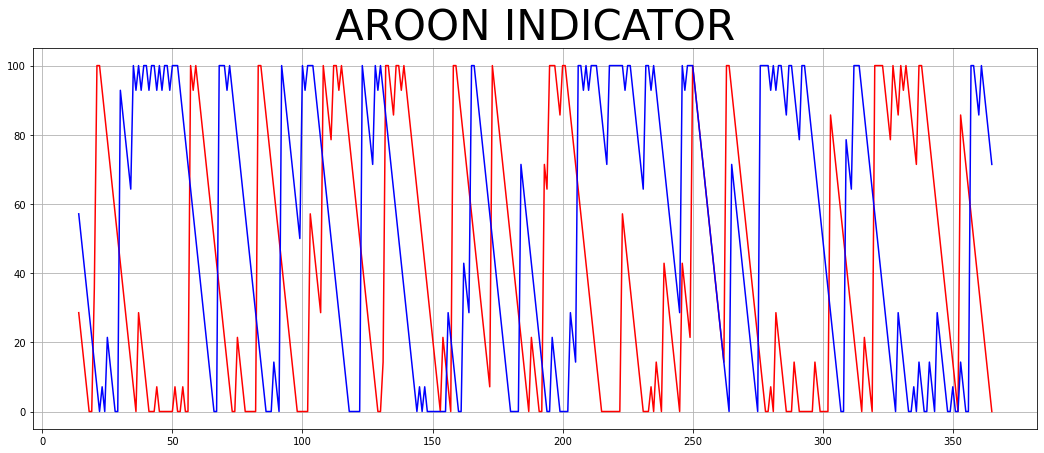

In [22]:
df['aroondown'], df['aroonup'] = ta.AROON(df['High'], df['Low'], timeperiod=14)
plt.figure(figsize=(18,7))
plt.plot(df['aroondown'],color='r')
plt.plot(df['aroonup'] ,color='b')
plt.title('AROON INDICATOR',size=42)
plt.grid()
plt.show()

In [23]:
buy=[0]
sell=[0]
Profit=[0]
Stop_loss=[0]
Close_order_sell=[0]
Close_order_buy=[0]
position_Buy=None
position_Sell=None

No handles with labels found to put in legend.


Profit = 9
Stop_loss = 13


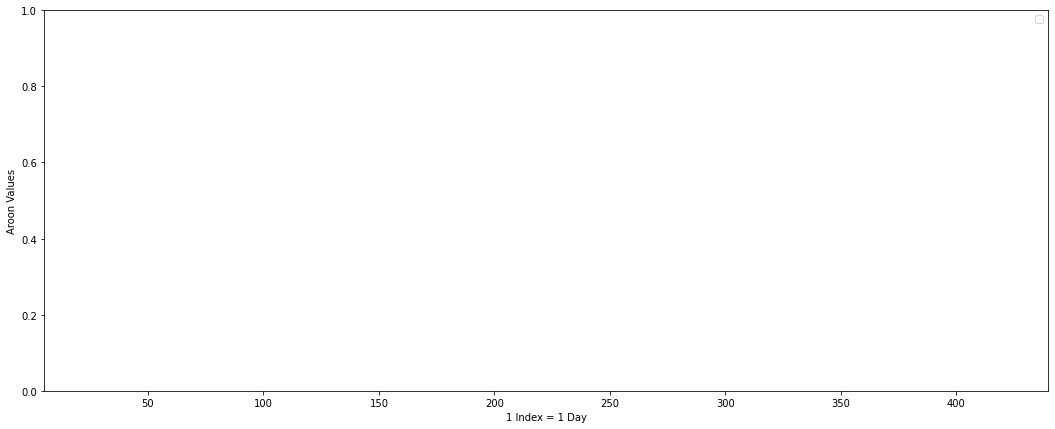

In [24]:
for i in range(1,len(df)):
######################################SIGNAL FOR BUY#######################################################

    if df['aroonup'][i] > df['aroondown'][i] and df['aroonup'][i-1] < df['aroondown'][i-1] and position_Buy!="Buy"    :
        buy.append(df['aroonup'][i])
        sell.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        Close_order_buy.append(temp['Close'][i])
        position_Buy="Buy"
            


######################################SIGNAL FOR SELL#######################################################
 
    elif df['aroonup'][i] < df['aroondown'][i] and df['aroonup'][i-1] > df['aroondown'][i-1] and position_Sell!="Sell"  :
        sell.append(df['aroondown'][i])
        buy.append(np.nan)
        Stop_loss.append(np.nan)
        Close_order_sell.append(temp['Close'][i])
        Profit.append(np.nan)
        position_Sell="Sell"
            
     

#####################################SIGNAL FOR BUY_macd#######################################################
    elif position_Buy=="Buy" and df['aroonup'][i]<df['aroondown'][i]:
        if temp['Close'][i]>Close_order_buy[-1] :
            Stop_loss.append(np.nan)
            Profit.append(df['aroonup'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
            
        elif temp['Close'][i]<Close_order_buy[-1] :
            Stop_loss.append(df['aroonup'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
######################################SIGNAL FOR SELL_macd#######################################################
    elif position_Sell=="Sell" and df['aroonup'][i]>df['aroondown'][i]:
        if temp['Close'][i]<Close_order_sell[-1]:
            Stop_loss.append(np.nan)
            Profit.append(df['aroonup'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        elif temp['Close'][i]>Close_order_sell[-1]:
            Stop_loss.append(df['aroonup'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
    else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
           
df['buy']=buy
df['sell']=sell
df['Stop_loss']=Stop_loss
df['Profit']=Profit
plt.figure(figsize=(18,7))
temp['buy']=df['buy']
temp['sell']=df['sell']
plt.plot(df['aroonup'],color='g',label='AROONUP_SOFTWARE')
plt.plot(df['aroondown'],color='r',label='AROONDOWN_SOFTWARE')
plt.plot(df['AROONUP'],color='g',linestyle='--',label='AROONUP_HARDWARE')
plt.plot(df['AROONDOWN'],color='r',linestyle='--',label='AROONDOWN_HARDWARE')
plt.scatter(df.index,df['buy'],marker='^',color='g',s=80,label='BUY_HARDWARE')
plt.scatter(df.index,df['sell'],marker="v",color='r',s=80,label='BUY_HARDWARE')
plt.scatter(temp.index,temp['buy'],marker='o',color='g',s=80,label='BUY_SOFTWARE')
plt.scatter(temp.index,temp['sell'],marker="o",color='r',s=80,label='SELL_SOFTWARE')
# plt.scatter(df.index,df['Stop_loss'],marker='X',color='r',s=100,label='STOP LOSS')
# plt.scatter(df.index,df['Profit'],marker='P',color='g',s=100,label='PROFIT')
plt.legend()
# plt.title('MACD INDICATOR',size=42)
# plt.grid()
plt.xlim([5,440])
plt.xlabel("1 Index = 1 Day")
plt.ylabel("Aroon Values")
print('Profit =',df['Profit'].count())
print('Stop_loss =',df['Stop_loss'].count())

In [25]:
buy=[0]
sell=[0]
Profit=[0]
Stop_loss=[0]
Close_order_sell=[0]
Close_order_buy=[0]
position_Buy=None
position_Sell=None

Local time    366
Open          366
High          366
Low           366
Close         366
Volume        366
aroondown     352
aroonup       352
buy            12
sell           14
Stop_loss      15
Profit         10
dtype: int64
PROFITIBLITY 40.0


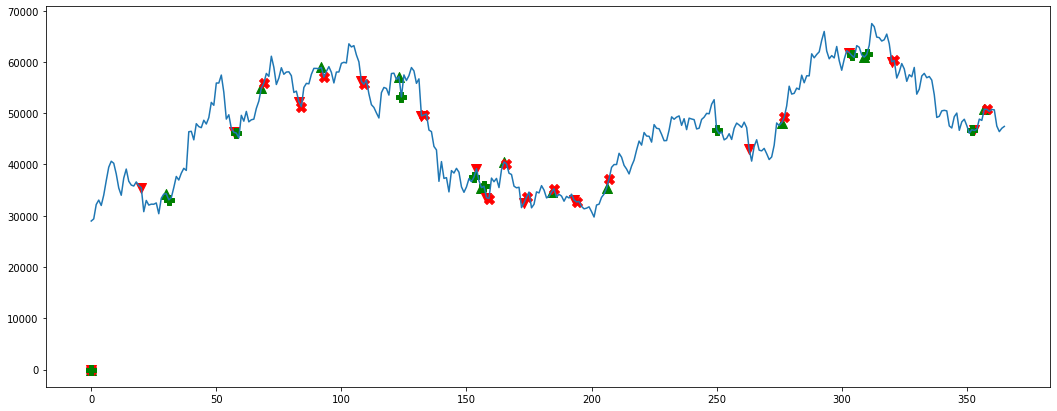

In [26]:
for i in range(1,len(df)):
######################################SIGNAL FOR BUY#######################################################

    if df['aroonup'][i] > df['aroondown'][i] and df['aroonup'][i-1] <= df['aroondown'][i-1] and position_Buy!="Buy"    :  
        buy.append(df['Close'][i])
        sell.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        Close_order_buy.append(df['Close'][i])
        position_Buy="Buy"
            


######################################SIGNAL FOR SELL#######################################################
 
    elif df['aroonup'][i] < df['aroondown'][i] and df['aroonup'][i-1] >= df['aroondown'][i-1] and position_Sell!="Sell" :
        sell.append(df['Close'][i])
        buy.append(np.nan)
        Stop_loss.append(np.nan)
        Close_order_sell.append(df['Close'][i])
        Profit.append(np.nan)
        position_Sell="Sell"
            
     

######################################SIGNAL FOR BUY_macd#######################################################
    elif position_Buy=="Buy" and df['aroonup'][i]<=df['aroondown'][i]:
        if df['Close'][i]>Close_order_buy[-1] :
            Stop_loss.append(np.nan)
            Profit.append(df['Close'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
            
        elif df['Close'][i]<Close_order_buy[-1] :
            Stop_loss.append(df['Close'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
            position_Buy=None
######################################SIGNAL FOR SELL_macd#######################################################
    elif position_Sell=="Sell" and df['aroonup'][i]>=df['aroondown'][i]:
        if df['Close'][i]<Close_order_sell[-1]:
            Stop_loss.append(np.nan)
            Profit.append(df['Close'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        elif df['Close'][i]>Close_order_sell[-1]:
            Stop_loss.append(df['Close'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
            position_Sell=None
    else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
           
df['buy']=buy
df['sell']=sell
df['Stop_loss']=Stop_loss
df['Profit']=Profit
plt.figure(figsize=(18,7))

plt.plot(df['Close'])

plt.scatter(df.index,df['buy'],marker='^',color='g',s=100,label='BUY')
plt.scatter(df.index,df['sell'],marker="v",color='r',s=100,label='SELL')
plt.scatter(df.index,df['Stop_loss'],marker='X',color='r',s=100,label='STOP LOSS')
plt.scatter(df.index,df['Profit'],marker='P',color='g',s=100,label='PROFIT')


print((df[df['buy']!=np.nan]).count())
print(f"PROFITIBLITY {(df['Profit'].count()/(df['Profit'].count()+df['Stop_loss'].count()))*100}")